# EDA for taxipred

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

folder_path = Path("../data/taxi_trip_pricing.csv")

df = pd.read_csv(folder_path)

## Dataset

In [24]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


## Info

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [26]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


### null values

In [27]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

### null values per row

In [28]:
df.isnull().sum(axis=1).value_counts()

0    562
1    341
2     83
3     14
Name: count, dtype: int64

In [73]:
column_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)})

print(column_info)

                                      Column Data Type  Non-Null Count  \
Trip_Distance_km            Trip_Distance_km   float64            1000   
Time_of_Day                      Time_of_Day    object            1000   
Day_of_Week                      Day_of_Week    object            1000   
Passenger_Count              Passenger_Count   float64            1000   
Traffic_Conditions        Traffic_Conditions    object            1000   
Weather                              Weather    object            1000   
Base_Fare                          Base_Fare   float64            1000   
Per_Km_Rate                      Per_Km_Rate   float64            1000   
Per_Minute_Rate              Per_Minute_Rate   float64            1000   
Trip_Duration_Minutes  Trip_Duration_Minutes   float64            1000   
Trip_Price                        Trip_Price   float64            1000   

                       Null Count  Null Percentage  
Trip_Distance_km                0              0.0  
Time_

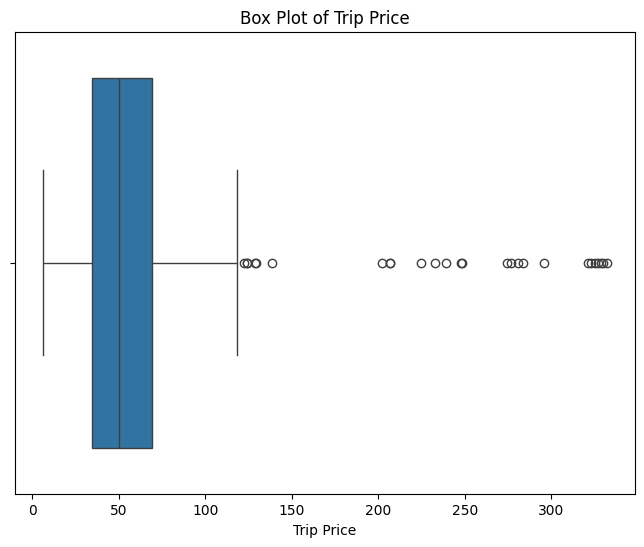

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Trip_Price'])
plt.title('Box Plot of Trip Price')
plt.xlabel('Trip Price')
plt.show()

In [77]:
Q1 = df['Trip_Price'].quantile(0.25)
Q3 = df['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers_iqr = df[(df['Trip_Price'] >= lower_bound) & (df['Trip_Price'] <= upper_bound)]

print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers with IQR method: {df_no_outliers_iqr.shape}")
df = df_no_outliers_iqr

Original data shape: (974, 11)
Data shape after removing outliers with IQR method: (971, 11)


In [78]:
matrix = df.select_dtypes(include=np.number).corr()
print(matrix)

                       Trip_Distance_km  Passenger_Count  Base_Fare  \
Trip_Distance_km               1.000000        -0.029661   0.041254   
Passenger_Count               -0.029661         1.000000   0.020120   
Base_Fare                      0.041254         0.020120   1.000000   
Per_Km_Rate                   -0.061705         0.035671  -0.005138   
Per_Minute_Rate               -0.024153         0.029806  -0.019768   
Trip_Duration_Minutes         -0.044249         0.029786  -0.009035   
Trip_Price                     0.692949         0.028752   0.039702   

                       Per_Km_Rate  Per_Minute_Rate  Trip_Duration_Minutes  \
Trip_Distance_km         -0.061705        -0.024153              -0.044249   
Passenger_Count           0.035671         0.029806               0.029786   
Base_Fare                -0.005138        -0.019768              -0.009035   
Per_Km_Rate               1.000000         0.010071               0.016516   
Per_Minute_Rate           0.010071       

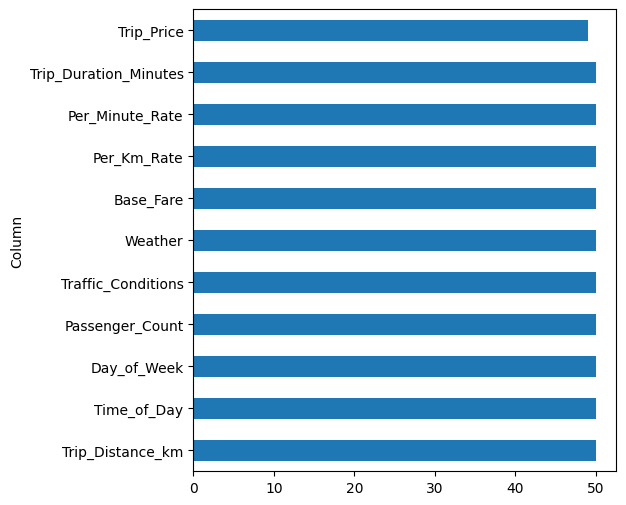

In [30]:
import matplotlib.pyplot as plt

missing_data = pd.DataFrame({
    "Column": df.columns,
    "Number Missing": df.isnull().sum(),
    "Percent Missing": (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data["Number Missing"] > 0].sort_values("Number Missing", ascending=False)

if len(missing_data) > 0:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    missing_data.plot(kind='barh', x='Column', y='Number Missing', ax=plt.gca(), legend=False)

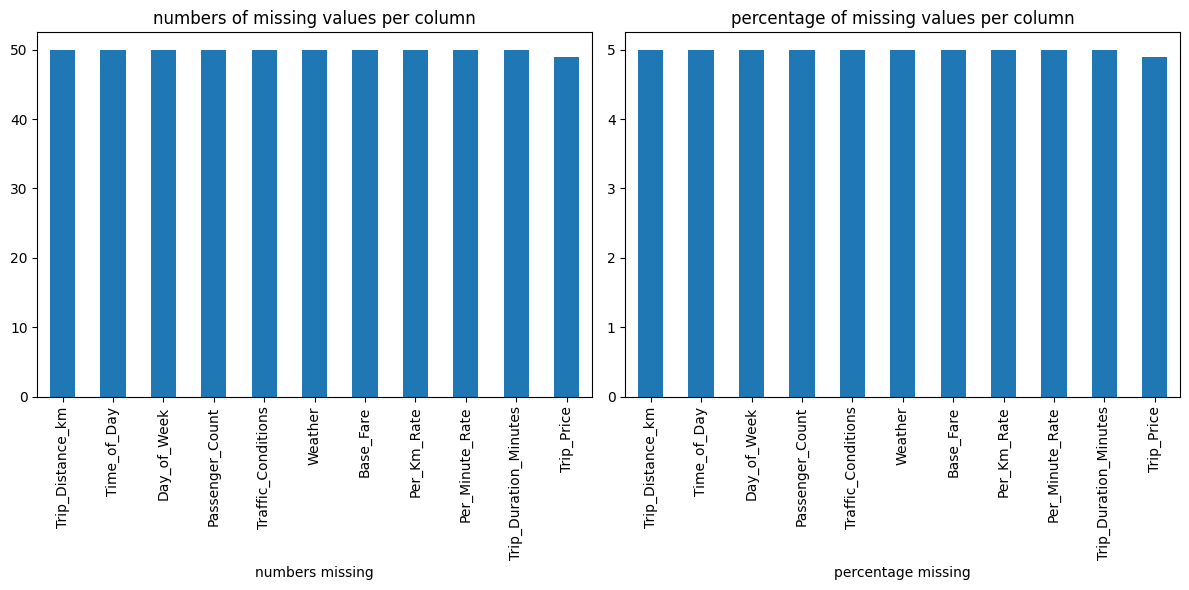

In [31]:
if len(missing_data) > 0:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    missing_data.plot(kind="bar", x="Column", y="Number Missing", ax=plt.gca(), legend = False)
    plt.title("numbers of missing values per column")
    plt.xlabel("numbers missing")

    plt.subplot(1, 2, 2)
    missing_data.plot(kind="bar", x="Column", y="Percent Missing", ax=plt.gca(), legend = False)
    plt.title("percentage of missing values per column")
    plt.xlabel("percentage missing")
    plt.tight_layout()
    plt.show()


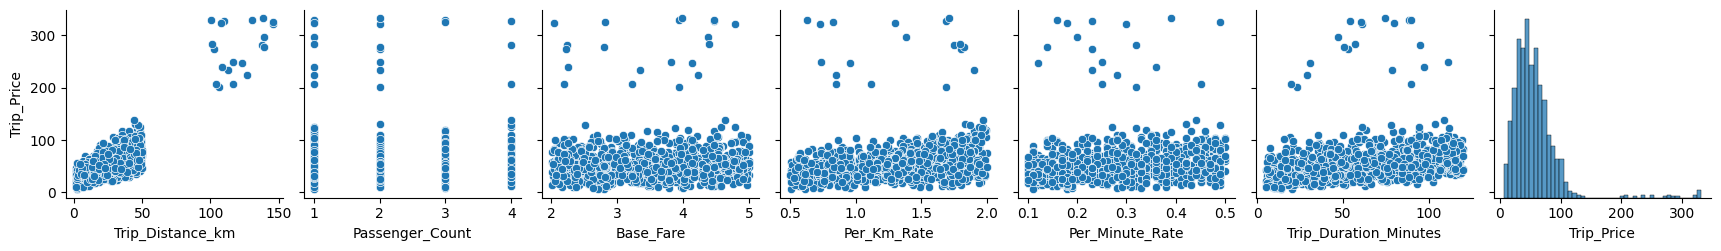

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(
    data=df,
    y_vars="Trip_Price"
)

In [35]:
def update_trip_price(df: pd.DataFrame) -> pd.DataFrame:
    filter_df = df[(df["Trip_Price"].isna()) & (df[["Trip_Distance_km","Base_Fare", "Per_Km_Rate", "Per_Minute_Rate", "Trip_Duration_Minutes"]].notna().all(axis=1))]

    df.loc[filter_df.index, "Trip_Price"] = (
        filter_df["Trip_Distance_km"] * filter_df["Per_Km_Rate"] +
        filter_df["Trip_Duration_Minutes"] * filter_df["Per_Minute_Rate"] +
        filter_df["Base_Fare"]
    )
    return df


def update_trip_distance(df: pd.DataFrame) -> pd.DataFrame:
    filter_df = df[(df["Trip_Distance_km"].isna()) & 
                   (df[["Trip_Price", "Base_Fare", "Per_Km_Rate", "Per_Minute_Rate", "Trip_Duration_Minutes"]].notna().all(axis=1))]

    df.loc[filter_df.index, "Trip_Distance_km"] = (
        filter_df["Trip_Price"] - 
        filter_df["Base_Fare"] - 
        (filter_df["Per_Minute_Rate"] * filter_df["Trip_Duration_Minutes"])
    ) / filter_df["Per_Km_Rate"]
    return df


def update_base_fare(df: pd.DataFrame) -> pd.DataFrame:
    filter_df = df[(df["Base_Fare"].isna()) &
                   (df[["Trip_Price", "Trip_Distance_km", "Per_Km_Rate", "Per_Minute_Rate", "Trip_Duration_Minutes"]].notna().all(axis=1))]

    df.loc[filter_df.index, "Base_Fare"] = (
        filter_df["Trip_Price"] -
        (filter_df["Per_Km_Rate"] * filter_df["Trip_Distance_km"]) -
        (filter_df["Per_Minute_Rate"] * filter_df["Trip_Duration_Minutes"])
    )
    return df


def update_per_km_rate(df: pd.DataFrame) -> pd.DataFrame:
    filter_df = df[(df["Per_Km_Rate"].isna()) &
                   (df[["Trip_Price", "Base_Fare", "Trip_Distance_km", "Per_Minute_Rate", "Trip_Duration_Minutes"]].notna().all(axis=1))]

    df.loc[filter_df.index, "Per_Km_Rate"] = (
        filter_df["Trip_Price"] -
        filter_df["Base_Fare"] -
        (filter_df["Per_Minute_Rate"] * filter_df["Trip_Duration_Minutes"])
    ) / filter_df["Trip_Distance_km"]
    return df


def update_per_minute_rate(df: pd.DataFrame) -> pd.DataFrame:
    filter_df = df[(df["Per_Minute_Rate"].isna()) &
                   (df[["Trip_Price", "Base_Fare", "Per_Km_Rate", "Trip_Distance_km", "Trip_Duration_Minutes"]].notna().all(axis=1))]

    df.loc[filter_df.index, "Per_Minute_Rate"] = (
        filter_df["Trip_Price"] -
        filter_df["Base_Fare"] -
        (filter_df["Per_Km_Rate"] * filter_df["Trip_Distance_km"])
    ) / filter_df["Trip_Duration_Minutes"]
    return df


def update_trip_duration_minutes(df: pd.DataFrame) -> pd.DataFrame:
    filter_df = df[(df["Trip_Duration_Minutes"].isna()) &
                   (df[["Trip_Price", "Base_Fare", "Per_Km_Rate", "Trip_Distance_km", "Per_Minute_Rate"]].notna().all(axis=1))]

    df.loc[filter_df.index, "Trip_Duration_Minutes"] = (
        filter_df["Trip_Price"] -
        filter_df["Base_Fare"] -
        (filter_df["Per_Km_Rate"] * filter_df["Trip_Distance_km"])
    ) / filter_df["Per_Minute_Rate"]
    return df

def clean_df(df: pd.DataFrame) -> pd.DataFrame:
    df = update_trip_price(df)
    df = update_trip_distance(df)
    df = update_base_fare(df)
    df = update_per_km_rate(df)
    df = update_per_minute_rate(df)
    df = update_trip_duration_minutes(df)
    return df

In [53]:
df=clean_df(df)
df.isnull().sum()

Trip_Distance_km          6
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                12
Per_Km_Rate              11
Per_Minute_Rate           5
Trip_Duration_Minutes    15
Trip_Price               17
dtype: int64

In [48]:
folder_path = Path("../data")
file_name = "taxi_trip_pricing_repaired.csv"

df.to_csv(folder_path / file_name, index=False)

<Axes: >

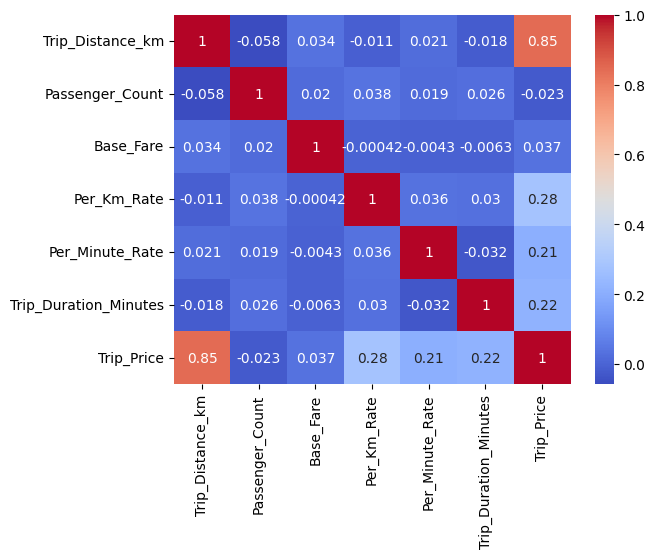

In [49]:
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")

In [54]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,8.64,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,0.50,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,0.32,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [58]:
# This bit will be done in 'data_processing.py' later, but I am trying it out in the EDA first
# We see that all except one column has 50 missing values
df.isnull().sum()

# For the numerical columns, we can fill the NaN values with the median of that column
numerical_columns = ['Trip_Distance_km', 'Passenger_Count',	'Base_Fare', 'Per_Km_Rate',	'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# 'mode()' returns a pandas series with the most frequent value in the series. 'iloc[0]' refers to THE most frequent
categorical_columns = ['Traffic_Conditions', 'Weather', 'Time_of_Day', 'Day_of_Week']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   object 
 5   Weather                1000 non-null   object 
 6   Base_Fare              1000 non-null   float64
 7   Per_Km_Rate            1000 non-null   float64
 8   Per_Minute_Rate        1000 non-null   float64
 9   Trip_Duration_Minutes  1000 non-null   float64
 10  Trip_Price             1000 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [60]:
df_encoded = pd.get_dummies(df, columns=categorical_columns)


X, y = df_encoded.drop('Trip_Price', axis=1), df_encoded['Trip_Price']

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Let's start by doing a linear regression prediction on the dataset
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# We train the data with the LinearRegression object ('model')
model.fit(X_train, y_train)

# Let's make a prediction!
y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 152.9836886686487
Mean Absolute Error: 8.518890859237796
R^2 Score: 0.8194898259279377


In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [70]:
# evaluating the RF regression model on our dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 3.5260101967720976
Mean Squared Error: 21.2742795353715
R^2 Score: 0.9748978212278221
